(05-07-2024)  Haritha P V

Take any dataset from kaggle and handling missing values.
After removing missing values, from the same dataset - draw bar chart, pie chart, line chart, histogram

In [22]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#csv file location
file_path="/content/drive/MyDrive/Meta scifor technologies/Copy of imdb_data.csv"

In [25]:
#Reading dataset
imdb_df=pd.read_csv(file_path)

In [26]:
#Checking the shape of data(rows and columns)
print(f'we have total {imdb_df.shape[0]} rows and {imdb_df.shape[1]} coloumns.')


we have total 3000 rows and 23 coloumns.


In [27]:
imdb_df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www

In [28]:

imdb_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [29]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [30]:
#counting the duplicate values
imdb_df.duplicated().value_counts()

#true is duplicate value

False    3000
Name: count, dtype: int64

no duplicate values

In [31]:
null_df=pd.DataFrame(imdb_df.isna().sum()).rename(columns={0:'number_of_nulls_values'})
print(null_df)

                       number_of_nulls_values
id                                          0
belongs_to_collection                    2396
budget                                      0
genres                                      7
homepage                                 2054
imdb_id                                     0
original_language                           0
original_title                              0
overview                                    8
popularity                                  0
poster_path                                 1
production_companies                      156
production_countries                       55
release_date                                0
runtime                                     2
spoken_languages                           20
status                                      0
tagline                                   597
title                                       0
Keywords                                  276
cast                              

In [32]:
#null values
null_values=imdb_df.isnull() == True

In [33]:
#replace all null values as NaN
imdb_df.fillna(np.nan)
imdb_df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [34]:
#missing values
missing_values=imdb_df.isnull().sum().sort_values(ascending=False)
missing_values

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
title                       0
status                      0
id                          0
release_date                0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
revenue                     0
dtype: int64

In [35]:
#since the number of missing value is high in 'belongs_to_collection','homepage ' ,it is better to drop the column
imdb_df.drop(['belongs_to_collection'], axis=1, inplace=True)
imdb_df.drop(['homepage'],axis=1, inplace=True)


In [36]:
#since we have less values in 'tagline' replace null values with 'others'
imdb_df['tagline'].fillna(value = 'no tagline', inplace = True)
#checking for null values
imdb_df['tagline'].isnull().sum()

0

In [37]:
#since we have less values in 'Keywords' replace null values with 'others'
imdb_df['Keywords'].fillna(value = 'no keyword', inplace = True)
#checking for null values
imdb_df['Keywords'].isnull().sum()

0

In [38]:
#since we have less values in country replace null values with 'others'
imdb_df['production_countries'].fillna(value = 'others', inplace = True)
#checking for null values
imdb_df['production_countries'].isnull().sum()

0

In [39]:
#since we have less values in 'production_companies' replace null values with 'others'
imdb_df['production_companies'].fillna(value = 'not provided', inplace = True)
#checking for null values
imdb_df['production_companies'].isnull().sum()

0

In [40]:
#since we have less values in 'spoken_languages' replace null values with 'others'
imdb_df['spoken_languages'].fillna(value = 'not provided', inplace = True)
#checking for null values
imdb_df['spoken_languages'].isnull().sum()

0

In [41]:
#since we have less values in 'crew' replace null values with 'others'
imdb_df['crew'].fillna(value = 'no information', inplace = True)
#checking for null values
imdb_df['crew'].isnull().sum()

0

In [42]:
#since we have less values in 'cast' replace null values with 'others'
imdb_df['cast'].fillna(value = 'no information', inplace = True)
#checking for null values
imdb_df['cast'].isnull().sum()

0

In [43]:
#since we have less values in 'overview' replace null values with 'others'
imdb_df['overview'].fillna(value = 'no overview', inplace = True)
#checking for null values
imdb_df['overview'].isnull().sum()

0

In [44]:
#since we have less values in 'genres' replace null values with 'others'
imdb_df['genres'].fillna(value = 'genere unavailable', inplace = True)
#checking for null values
imdb_df['genres'].isnull().sum()

0

In [45]:
#since we have less values in 'runtime ' replace null values with 'others'
imdb_df['runtime'].fillna(value ='unknown', inplace = True)
#checking for null values
imdb_df['runtime'].isnull().sum()

0

In [46]:
#since we have less values in 'poster_path ' replace null values with 'others'
imdb_df['poster_path'].fillna(value ='unknown', inplace = True)
#checking for null values
imdb_df['poster_path'].isnull().sum()

0

In [47]:
# Replaced null values
imdb_df.isnull().sum()

id                      0
budget                  0
genres                  0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
Keywords                0
cast                    0
crew                    0
revenue                 0
dtype: int64

# **Pie chart**

In [50]:
# Count occurrences of each language
language_counts = imdb_df['original_language'].value_counts()


In [51]:
top_3_languages = language_counts.head(3)
top_3_languages

original_language
en    2575
fr      78
ru      47
Name: count, dtype: int64

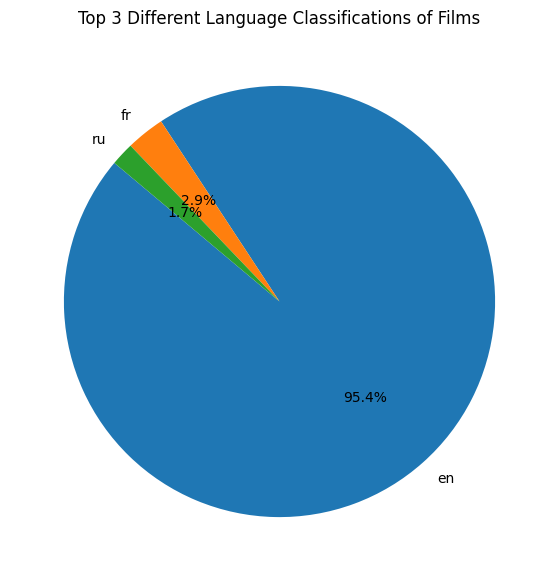

In [52]:
plt.figure(figsize=(7, 7))
plt.pie(top_3_languages, labels=top_3_languages.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Different Language Classifications of Films')
plt.show()

In [57]:
from collections import Counter
import ast

In [62]:
# Function to extract genre names from the JSON-like strings, handling potential errors
def extract_genre_names(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres]
    except (SyntaxError, ValueError):
        return ['Unknown']  # Replace with a default value or handle error as needed

# Apply the function to the 'genres' column
imdb_df['genres_list'] = imdb_df['genres'].apply(extract_genre_names)

# Flatten the list of genres and count occurrences
all_genres = [genre for sublist in imdb_df['genres_list'] for genre in sublist]
genre_counts = Counter(all_genres)

# Convert the counter to a DataFrame for easy plotting
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])


In [68]:
print("Genre Counts:")
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

Genre Counts:
Comedy: 1028
Drama: 1531
Family: 260
Romance: 571
Thriller: 789
Action: 741
Animation: 141
Adventure: 439
Horror: 301
Documentary: 87
Music: 100
Crime: 469
Science Fiction: 290
Mystery: 225
Foreign: 31
Fantasy: 232
War: 100
Western: 43
History: 132
Unknown: 7
TV Movie: 1


# **Bar chart**

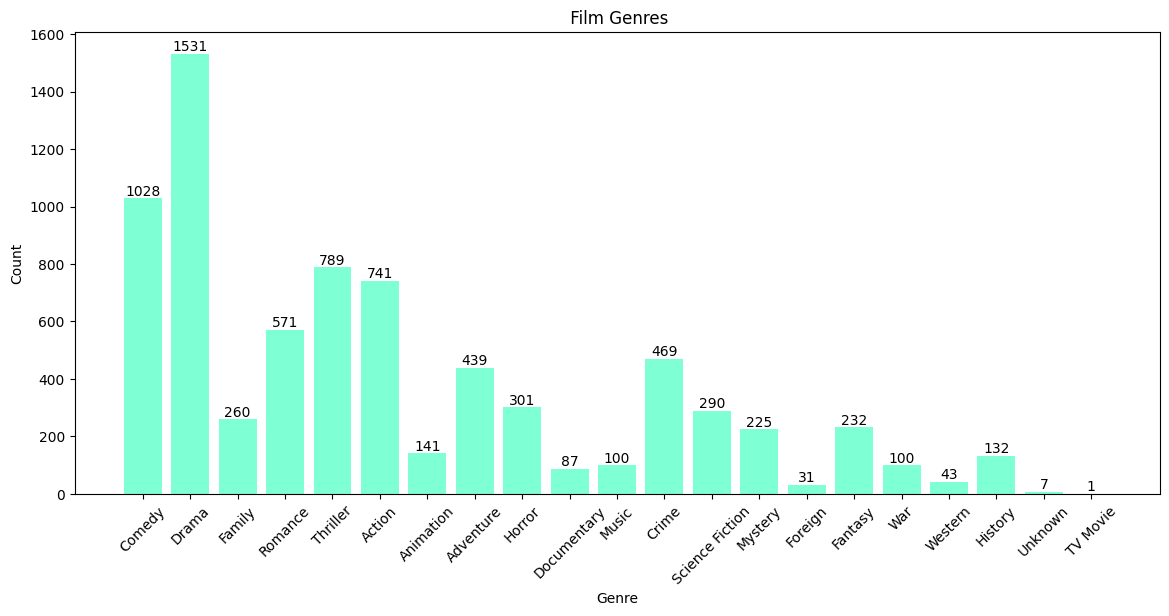

In [131]:
# Plotting the barchart
plt.figure(figsize=(14, 6))
bars = plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='aquamarine')

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, yval, ha='center', va='bottom')


plt.xlabel('Genre')
plt.ylabel('Count')
plt.title(' Film Genres')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# **Line chart**

In [132]:
# Sort DataFrame by 'popularity' column in descending order
top_10_popular_films = imdb_df.sort_values(by='popularity', ascending=False).head(10)

In [133]:
# Display the top 5 most popular films
print("Top 10 Most Popular Films:")
print(top_10_popular_films[['title', 'popularity']])

Top 10 Most Popular Films:
                               title  popularity
518                     Wonder Woman  294.337037
684             Beauty and the Beast  287.253654
1695                     Baby Driver  228.032744
2326                        Deadpool  187.860492
2126  Guardians of the Galaxy Vol. 2  185.330992
1309                       Gone Girl  154.801009
1715  War for the Planet of the Apes  146.161786
1673                 The Dark Knight  123.167259
1126                    The Avengers   89.887648
2293                      The Circle   88.439243


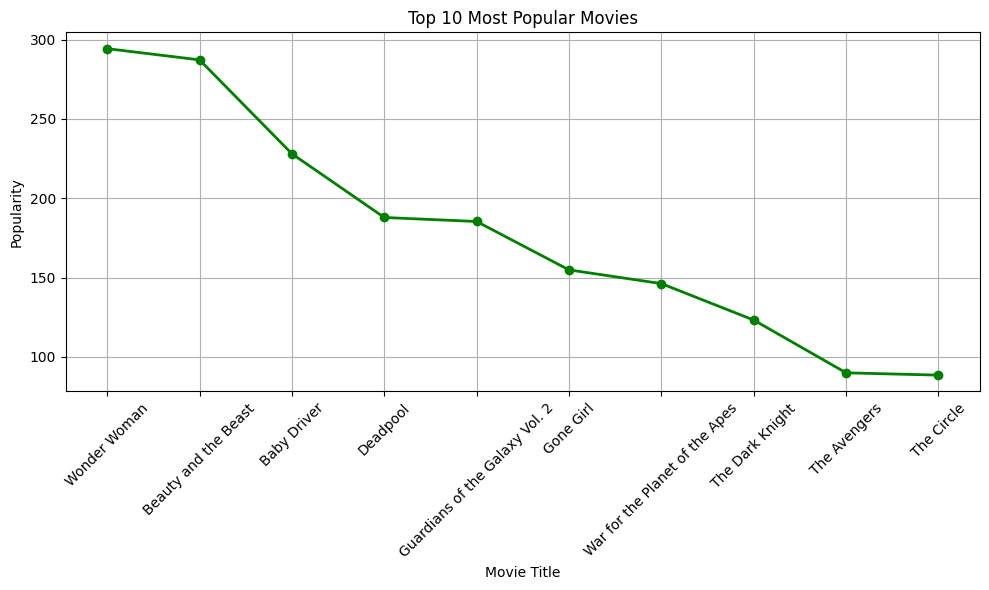

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_popular_films['title'], top_10_popular_films['popularity'], marker='o', linestyle='-', color='green', linewidth=2)
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title('Top 10 Most Popular Movies')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Histogram**

In [109]:
#classification based on revenue

top_7_revenue = imdb_df.sort_values(by='revenue', ascending=False).head(7)


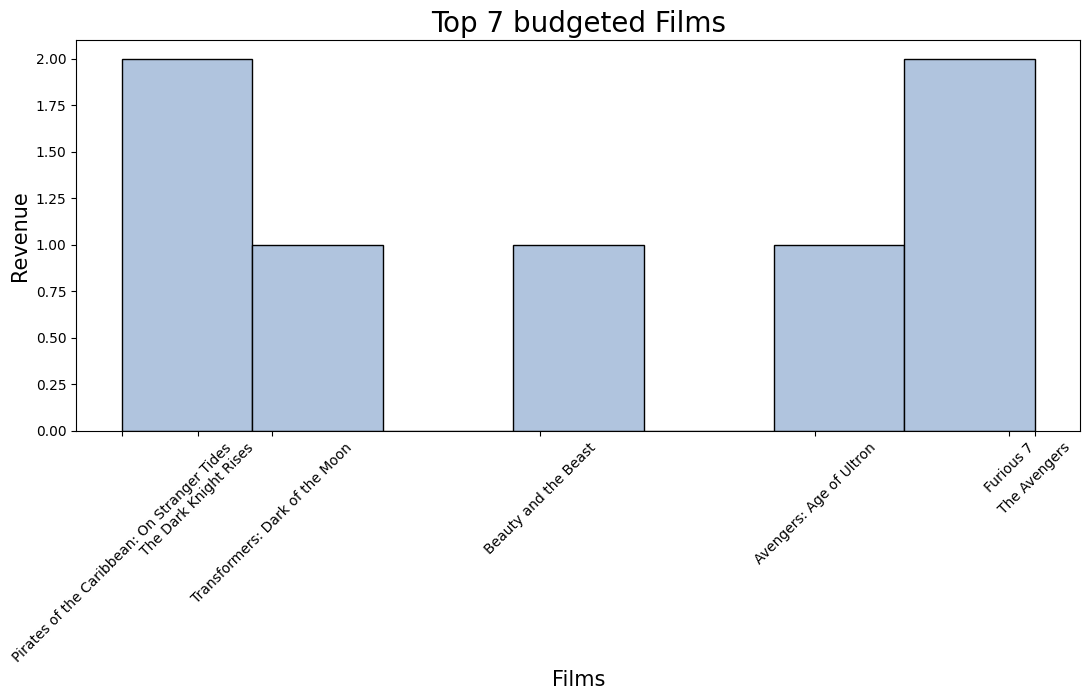

In [130]:
# Plotting the histogram
plt.figure(figsize=(11, 5))
plt.hist(top_7_revenue['revenue'], bins=7, color='lightsteelblue', edgecolor='black')
plt.xlabel('Films', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.title('Top 7 budgeted Films', fontsize=20)
plt.tight_layout()

# Adding movie titles as xticks
plt.xticks(top_7_revenue['revenue'], top_7_revenue['title'], rotation=45)

plt.show()

# **What's the use of pandas, numpy, seaborn, matplotlib, OS library in python**?
**Pandas:**

Use: Data manipulation and analysis.

Features: Provides data structures (like DataFrame), tools for reading and writing data, and powerful data manipulation functionalities (e.g., filtering, grouping, merging).

Example: Load CSV files, clean and preprocess data, perform statistical operations.

**NumPy:**

Use: Numerical computing and array operations.

Features: Efficiently handles large arrays and matrices of numeric data, offers mathematical functions to operate on these arrays, and integrates with other libraries for scientific computing.

Example: Linear algebra operations, statistical computations, generating random numbers.

**Seaborn:**

Use: Statistical data visualization.

Features: Provides a high-level interface for drawing attractive and informative statistical graphics, built on top of Matplotlib. Simplifies complex visualizations like distribution plots, heatmaps, and categorical plots.

Example: Visualize distributions, relationships between variables, and patterns in data.

**Matplotlib:**

Use: Basic plotting and visualization.

Features: Comprehensive library for creating static, animated, and interactive visualizations in Python. Supports various types of plots (e.g., line plots, scatter plots, histograms) and customization of plot elements.

Example: Create charts, plots, and figures to explore data, analyze trends, and communicate results.

**OS Library:**

Use: Operating system interfaces and file system operations.

Features: Provides functions to interact with the operating system, manage files and directories, and execute system commands from within Python scripts.

Example: Navigate directories (os.chdir, os.listdir), manipulate files (os.path methods), execute shell commands (os.system).


